#import

In [ ]:
!pip install ypstruct

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from ypstruct import struct

#code

In [ ]:
#sphere
def esfera(x):
  return sum(x**2)

In [ ]:
def repara(individuo, problema):
  individuo.vetor = np.maximum(individuo.vetor, problema.limite_inferior)
  individuo.vetor = np.minimum(individuo.vetor, problema.limite_superior)

In [ ]:
#inicializacao da populacao
def inicializacao(problema, parametros):
  individuo_vazio = struct()
  individuo_vazio.vetor = None
  individuo_vazio.aptidao = None

  populacao = individuo_vazio.repeat(parametros.tamanho_populacao)

  for i in range(parametros.tamanho_populacao):
    populacao[i].vetor = np.random.uniform(problema.limite_inferior, problema.limite_superior, problema.nvar)
    populacao[i].aptidao = problema.funcao_aptidao(populacao[i].vetor)
    
  return populacao

In [ ]:
#definicao do problema
problema = struct()
problema.funcao_aptidao = esfera

problema.nvar = 3
problema.limite_inferior = [-10, -10, -10]
problema.limite_superior = [ 10,  10,  10]


#definicao da ED
parametros =struct()
parametros.maximo_iteracoes = 10
parametros.tamanho_populacao = 20
parametros.probabilidade_cruzamento = 0.9
parametros.mutacao_F = 1.4

In [ ]:
#ED
melhor = struct()
melhor.vetor = None
melhor.aptidao = np.inf

pop = inicializacao(problema, parametros)

pop_ordenada = sorted(pop, key=lambda x:  x.aptidao, reverse = True)

melhor.vetor = pop[0].vetor
melhor.aptidao = pop[0].aptidao

melhores_custos = np.empty(parametros.maximo_iteracoes + 1)
melhores_custos[0] = melhor.aptidao

In [ ]:
''' Crossover '''

# BIN
def cruzamento_bin(original, mutado, taxa, dimensao):
  recombinado = original.deepcopy()
  
  j_rand = np.random.random_integers(0, dimensao - 1, 1)

  for j in range(dimensao):
    r = np.random.rand()
    if ((r < taxa) or (j == j_rand)):
      recombinado.vetor[j] = mutado.vetor[j]
    
  return recombinado 

# EXP
def cruzamento_exp(original, mutado, taxa, dimensao):
  recombinado = original.deepcopy()
  n = np.random.random_integers(0, dimensao - 1, 1)
  L = 1

  while ((np.random.rand() < taxa) and (L < dimensao)):
    L = L + 1

  for _ in range(L):
    pos = n % dimensao
    n = n + 1
    recombinado.vetor[pos] = mutado.vetor[pos]
    
  return recombinado 

In [ ]:
''' Mutação '''

# RAND 1
def mutacao_rand_1(pop, parametros):
  r = random.sample(range(parametros.tamanho_populacao), 3)

  mutado = pop[r[0]].deepcopy()
  mutado.vetor = mutado.vetor + parametros.mutacao_F * (pop[r[1]].vetor - pop[r[2]].vetor)

  return mutado

#RAND 2
def mutacao_rand_2(pop, parametros):
  r = random.sample(range(parametros.tamanho_populacao), 5)

  mutado = pop[r[0]].deepcopy()
  mutado.vetor = mutado.vetor + parametros.mutacao_F * (pop[r[1]].vetor - pop[r[2]].vetor) + parametros.mutacao_F * (pop[r[3]].vetor - pop[r[4]].vetor)

  return mutado

# BEST 1
def mutacao_best_1(pop, melhor, parametros):
  r = random.sample(range(parametros.tamanho_populacao), 2)

  mutado = melhor.deepcopy()
  mutado.vetor = mutado.vetor + parametros.mutacao_F * (pop[r[0]].vetor - pop[r[1]].vetor)

  return mutado

#BEST 2
def mutacao_best_2(pop, melhor, parametros):
  r = random.sample(range(parametros.tamanho_populacao), 4)

  mutado = melhor.deepcopy()
  mutado.vetor = mutado.vetor + parametros.mutacao_F * (pop[r[0]].vetor - pop[r[1]].vetor) + parametros.mutacao_F * (pop[r[2]].vetor - pop[r[3]].vetor)

  return mutado

def mutacao_current_to_best(pop, original, melhor, parametros):
  r = random.sample(range(parametros.tamanho_populacao), 2)

  mutado = original.deepcopy()
  mutado.vetor = mutado.vetor + parametros.mutacao_F * (melhor.vetor - original.vetor) + parametros.mutacao_F * (pop[r[0]].vetor - pop[r[1]].vetor)

  return mutado

In [ ]:
#loop principal
for iteracao in range(parametros.maximo_iteracoes):
  
  #gera proxima populacao
  for i in range(parametros.tamanho_populacao):
    #mutacao
    #mutado = mutacao_rand_1 (pop, parametros)
    #mutado = mutacao_best_1 (pop, melhor, parametros)
    #mutado = mutacao_rand_2 (pop, parametros)
    #mutado = mutacao_best_2 (pop, melhor, parametros)
    mutado = mutacao_current_to_best (pop, pop[i], melhor, parametros)

    #cruzamento
    #recombinado = cruzamento_exp(pop[i], mutado, parametros.probabilidade_cruzamento, problema.nvar)
    recombinado = cruzamento_bin(pop[i], mutado, parametros.probabilidade_cruzamento, problema.nvar)
    
    #evita vetor fora dos intervalos de minimos e maximos
    repara(recombinado, problema)
    
    #avalia os novos individuos    
    recombinado.aptidao = problema.funcao_aptidao(recombinado.vetor)
    
    #Seleciona se entra na populacao
    if (recombinado.aptidao > pop[i].aptidao):
      pop[i] = recombinado


  
  #pop_ordenada = sorted(pop, key=lambda x: x.aptidao)
  pop_ordenada = sorted(pop, key=lambda x:  x.aptidao, reverse = True)

  #acha o melhor
  melhor.vetor = pop_ordenada[0].vetor
  melhor.aptidao = pop_ordenada[0].aptidao

  #guarda o historico
  melhores_custos[iteracao + 1] = melhor.aptidao


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  import sys


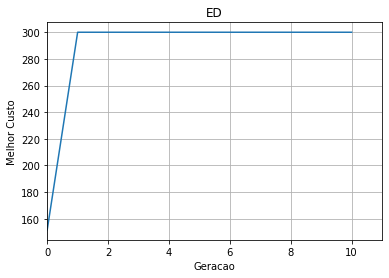

[151.55489605 300.         300.         300.         300.
 300.         300.         300.         300.         300.
 300.        ]


In [ ]:
#plotar os resultados
plt.plot(melhores_custos)
plt.xlim(0, parametros.maximo_iteracoes + 1)
plt.xlabel('Geracao')
plt.ylabel('Melhor Custo')
plt.title('ED')
plt.grid(True)
plt.show()

print(melhores_custos)